/var/folders/jd/wlq5yr_n4knc0k78z_jdh19m0000gn/T/ipykernel_7928/1150062278.py:51: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(path[i], f(path[i]))


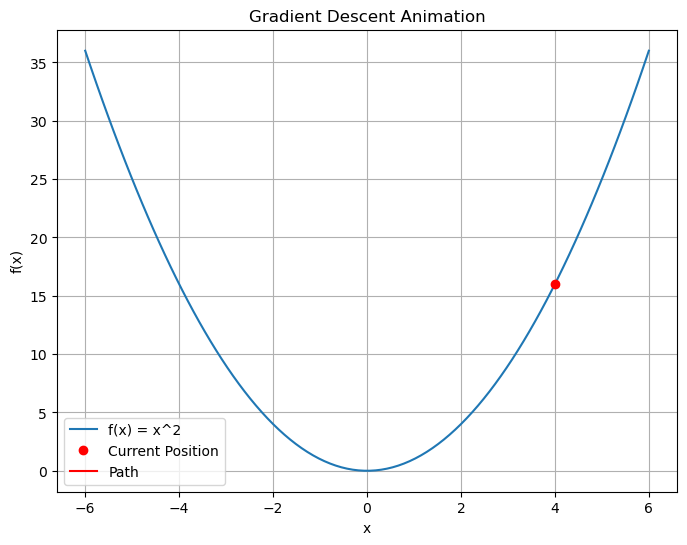

MovieWriter imagemagick unavailable; using Pillow instead.
/var/folders/jd/wlq5yr_n4knc0k78z_jdh19m0000gn/T/ipykernel_7928/1150062278.py:51: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(path[i], f(path[i]))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 함수 정의
def f(x):
    return x ** 2

# 도함수(미분) 정의
def df(x):
    return 2 * x

# 경사하강법
def gradient_descent(starting_x, learning_rate, n_steps):
    x = starting_x
    path = []  # 각 단계에서의 x 값 저장
    for _ in range(n_steps):
        grad = df(x)
        x = x - learning_rate * grad
        path.append(x)
    return np.array(path)

# 초기 설정
starting_x = 5  # 시작점
learning_rate = 0.1  # 학습률
n_steps = 15  # 단계 수

# 경사하강법 실행
path = gradient_descent(starting_x, learning_rate, n_steps)

# 그래프 데이터 준비
x = np.linspace(-6, 6, 100)
y = f(x)

# 그래프 설정
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='f(x) = x^2')
point, = ax.plot([], [], 'ro', label='Current Position')
line, = ax.plot([], [], 'r-', label='Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Animation')
plt.legend()
plt.grid(True)

# 애니메이션 업데이트 함수
def update(i):
    if i >= n_steps:  # n_steps 이상의 인덱스에 대해선 업데이트를 멈춤
        return line, point
    line.set_data(path[:i+1], f(path[:i+1]))
    point.set_data(path[i], f(path[i]))
    return line, point

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=n_steps, interval=200, blit=True, repeat=True)
plt.show()
ani.save('sine_wave_interval_100ms.gif', writer='imagemagick')